In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_in=pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx',1)
get_out=pd.read_excel('附件1：123家有信贷记录企业的相关数据.xlsx',2)

In [2]:
#汇总每个公司的数据 略慢
def sumfun(get_in,name):#'E%d'%1
    record=[]
    for i in range(len(get_in)):
        if(get_in['企业代号'][i]==name):
            record.append(get_in['价税合计'][i])
    return sum(record)
name_list=get_in['企业代号'].drop_duplicates()
name_list=name_list.values
get_in_price=[]
for name in name_list:
    get_in_price.append(sumfun(get_in,name))
get_out_price=[]
for name in name_list:
    get_out_price.append(sumfun(get_out,name))    
get_in_price,get_out_price=np.array(get_in_price),np.array(get_out_price)

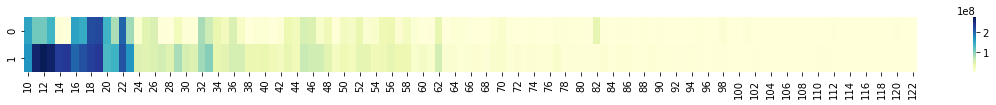

In [24]:
#画图 num控制从第几个公司开始 因为前几个公司的值太大 会影响热力图效果
num=10
dataset=pd.DataFrame([get_in_price,get_out_price])
plt.figure(figsize=(20,1))
sns.heatmap(dataset.iloc[:,num:],annot=False,cmap="YlGnBu")
plt.show()#展示下原始数据集

In [18]:
#导出数据到result.csv
record=pd.DataFrame([name_list,get_in_price,get_out_price,get_in_price-get_out_price],index=['name','get_in','get_out','get_in-get_out'])
record.to_csv('results.csv')